# DETR (ECCV 2020)


## 논문  요약


논문의 장점
: 기존 객체탐지 기술보다 매우 간단하고 경쟁력 있는 성능

논문 제안
- DETR(DEtection TRansformer)
:이분 매칭 손실 함수 + Transformer 

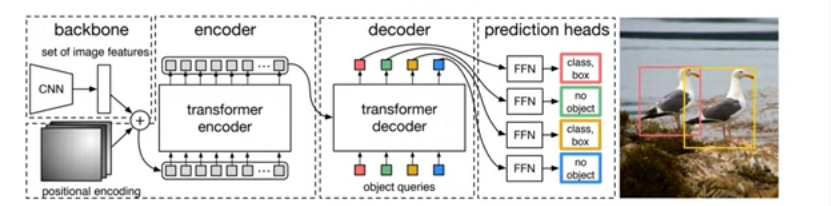


### 기존 상황

-기존 객체 탐지(object detection)은 너무 복잡하고 다수의 라이브러리를 사용한다

복잡한 이유(prior knowledge)

1.bounding box의 형태
2.bounding box가 겹칠 때 처리 방법

위 2가지를 고려해서 처리한다

그 이후에 NMS기술(중복 박스 삭제, 압축하여 한 개 박스)
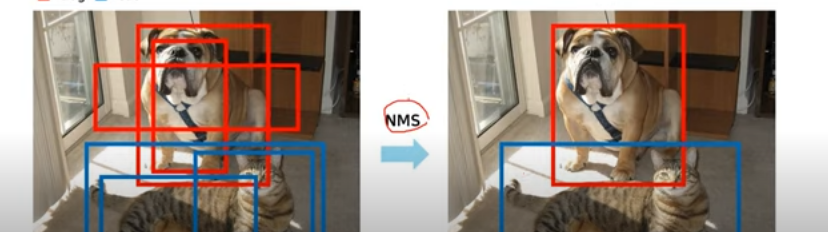


###  논문의 핵심 아이디어

1. 이분 매칭(bipartite matching)
: 이분 매칭->set prediction problem을 직접적으로 해결
(인스턴스가 중복되지 않게됨)

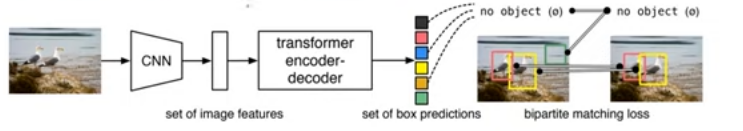

2. Transformer

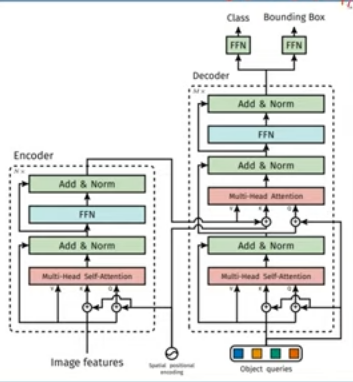

-Transformer
 
 : Attention을 통해 전체 이미지의 문맥 정보 이해
 : 각 인스턴스의 상호작용 파악 용이
 : 거리가 먼 픽셀 간의 연관성 파악 용이
 :RNNs방식을 그대로 사용하는 것이 아닌 parallel decoding 방식으로 한다
 
-Encoder

:global attention을 통해서 잘 분리해줌

:이미지 특징을 갖고 있는 각 픽셀 위치 데이터 받아 수행

:d * HW 크기의 연속성을 띤 feature map을 입력.
  -d = image feature, HW = 각 픽셀 위치 정보.
  
: self-attention map->시각화-> 개별 인스턴스 분리

:상호 연관성을 찾아 object를 분리하게 함

:Encoder이 커질수록 성능이 좋아짐

:이미지에서 상대적인 위치 찾기(positional encodings)


-Decoder

:extremities부분을 캐치하는 것이 중ㅇ


:N개의 object query를 초기 입력으로 받아 정보로 활용

:병렬적으로 처리

:각 query는 서로 다른 고유한 인스턴스 구별

: 인스턴스의 클래스와 경계선 추출

:차원 flattens하고 object queries
-> 서로 다른 인스턴스가 생길 수 있게 해줌

: 각 인스턴스에서 말단 부분이 경계선 추출하기 쉽기 때문에 Attention Score의 값이 높게 형성

:self-attention and encoder-decoder attention은
이미지 전체에 대해서 추론이 가능하다
 
: Decoder이 작을 경우 cross-correlations가 잘 되지 않아서 충분하고 깊게 layer을 쌓아야 한다.

### 처리 과정 및 결과

self-attention mechanisms(각 인스턴스의 상호 작용 정보 파악 하는데 용이)
-->trans-formers-> encoder-decoder architectures->sequence prediction 처리- >remove duplicate predictions & 메뉴얼 정하는 노력 줄임

### DETR장점

1. RNNs방식을 그대로 사용 X

2. Faster R-CNN비교해도 우수한 성능

3. 큰 object는 성과가 있다.

4. Panoptic Segmentation에서도 확장 가능성을 보여줌
### DETR단점

1. 작은 object는 효과가 떨어짐

2. 학습 시간이 길다

### DETR 연구

1. Set Prediction

-직접적으로 prediction으로 하면 NMS와 같은 postprocessing에 자유롭다.
  
-Transformer->병렬적으로 검색 + LOSS값이 최소인 이분 매칭(Hungarian algorithm) -> RNN보다 효과적으로 처리함


2. Transformers and Parallel Decoding

-Attention mechanisms의 효과를 극대화시킴
(input sequence 다 사용함)

-전체 pixels의 문맥 파악,긴 sequence에 높은 성능

-계산 비용  또한 효과적으로 줄임

3. Object detection

-수작업으로 중복을 제거하는 방식을 해결

-Set-based  loss: 부족한 점 맞고 성능이 뛰어나지 않음

-Recurrent detectors: end to end로 데이터만 주어지면 제대로 처리 가능. 



### DETR model

0.unique matching구함(by direct set predictions )

1. Object detection set prediction loss(이분매칭)

-N: 충분히 크게  설정하여 설치

-bipartite matching 진행

-bounding box 수렴 잘되게 만들기

-이분매칭

 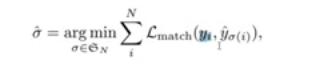

  yi :실제 값, y(i): 예측값
  
-가장 작은 loss값의 합을 갖도록 매칭한다.

-Hungarian algorithm->optimal assignment(가중이분매칭)

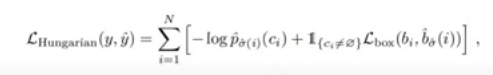

-Bounding box loss
:크기랑 상관없이 box가 많이 겹치도록 만들어줌

-이분매칭 -> output값,실제값이 유사한 매칭을 찾기
->loss function->이분 매칭 값과 모델값이 유사한 매칭

2.DETR architecture

-PyTorch로 간단하고 짧은 코드로 구현 가능.

-Backbone
: feature 추출

-Transformer encoder

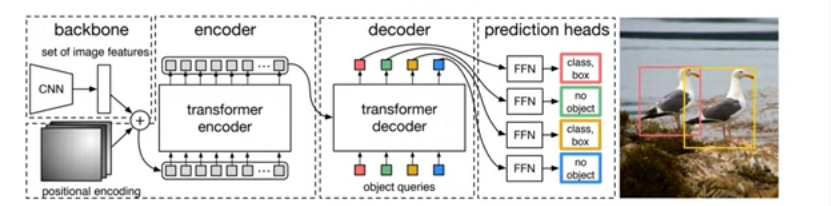

:encoder layer is a standard architecture

:encoder layer is a feed forward network(FFN)

:각 이미지의 위치 정보 파악 가능

:각각의 연관성 정보 파악(by attention scores)

-Prediction feed-forward networks(FFNs)

 :4차원 벡터를 뽑을 수 있게 해줌
 :빈 클래스는 no object vector
 :성능을 높혀줌
 
4.Experiments

0.정량적 평가를 실행(AP, ablation study)

1.가변적이고 확장가능성이 있다.

5.Dataset.

-COCO 2017 detection and panoptic segmentation

-118K training images

-5K validation images

-한 이미지에 들어가는 최대 인스턴스:63

6.Technical details.

-실제 학습을 위한 하이퍼 파라미터!

-Network: ResNet-101, DETR-R101, DETR-DC5 , DETR-DC5- R101 

-이미지 인식: scale augmentation, 
              random  crop augmentations

### Analysis

1.Decoder output slot analysis

DETR은 각각의 Object query가 수행을 세분하게 잘하고 있다.
그 이유는

i) N개의 object는 각각의 박스나 영역이 다른 부분에서 학습이 되었다

2.Generalization to unseen numbers of instances.

-평가단계에서 트레이닝 데이터로 이용되지 않을 것을 잘 인식하나!

-DETR에서는 잘 분류한다.

3.DETR for panoptic segmentation

-이미지가 주어졌을 때 픽셀 단위로 어떤 색깔이 속하는 지 알려주는 것이다.

-stuff(배경) and things(사물) 등 인식을 잘하네


### 중요 요소

1.the global self - attention in encoder

2.FFN

3.multiple decoder layers

4.positional encodings

5.final object detection performance


### Conclusion

DETR

-bipartite matching(이분 매칭) & object detection systesms base on transformers 이용이 가장 큰 특징

-large objects,
DETR >>>>>>> Faster R-CNN

이유: self-attention, encoder-decoder attention
 ->global information(전체 이미지에 대한 문맥정보get)
 
